In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the csv file
data = pd.read_csv('/Users/spandanatammineedi/desktop/Projects/Covid19/mexico_covid19.csv')

In [3]:
data.shape

(263007, 41)

In [4]:
data.head

<bound method NDFrame.head of              id FECHA_ARCHIVO ID_REGISTRO  ENTIDAD_UM  ENTIDAD_RES  RESULTADO  \
0          9269    2020-04-12      00011f          25           25          2   
1         33333    2020-04-12      00014e          14           14          2   
2         35483    2020-04-12      000153           8            8          1   
3          7062    2020-04-12      0001b6           9           15          1   
4         23745    2020-04-12      0001c1           9            9          2   
...         ...           ...         ...         ...          ...        ...   
263002  7094887    2020-06-03      1e019c          32           32          1   
263003  7053721    2020-06-03      1e2b05          12           12          1   
263004  7055429    2020-06-03      1e473f          20           20          1   
263005  7043768    2020-06-03      1e6da1          13           13          1   
263006  7093277    2020-06-03      1e8453           9            9          1  

In [5]:
list(data.columns)

['id',
 'FECHA_ARCHIVO',
 'ID_REGISTRO',
 'ENTIDAD_UM',
 'ENTIDAD_RES',
 'RESULTADO',
 'DELAY',
 'ENTIDAD_REGISTRO',
 'ENTIDAD',
 'ABR_ENT',
 'FECHA_ACTUALIZACION',
 'ORIGEN',
 'SECTOR',
 'SEXO',
 'ENTIDAD_NAC',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'MIGRANTE',
 'PAIS_NACIONALIDAD',
 'PAIS_ORIGEN',
 'UCI']

# DATA CLEANING

In [6]:
#Create new dataframe with required columns
subdf = data[['EDAD','SEXO','NEUMONIA','DIABETES','ASMA','HIPERTENSION','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','RESULTADO']]

In [7]:
subdf["EDAD"].head

<bound method NDFrame.head of 0         74
1         71
2         50
3         25
4         28
          ..
263002    39
263003    53
263004    65
263005    71
263006    18
Name: EDAD, Length: 263007, dtype: int64>

In [8]:
#To change column names
sympdf = subdf.rename(columns = {"EDAD" : "Age" ,"SEXO" : "Sex" , "NEUMONIA" : "Pneumonia" , 
                         "DIABETES" : "Diabetes" , "ASMA": "Asthma" , "HIPERTENSION" : "Hypertension" ,
                         "CARDIOVASCULAR":"Cardio_vascular", "OBESIDAD":"Obesity" , "RENAL_CRONICA":"Chronic_renal",
                         "TABAQUISMO" : "Smoking", "RESULTADO" : "Result"},inplace = False)

In [9]:
sympdf.head

<bound method NDFrame.head of         Age  Sex  Pneumonia  Diabetes  Asthma  Hypertension  Cardio_vascular  \
0        74    2          2         1       2             1                2   
1        71    1          2         1       2             1                2   
2        50    2          1         2       2             2                2   
3        25    1          2         2       2             2                2   
4        28    1          2         2       2             2                2   
...     ...  ...        ...       ...     ...           ...              ...   
263002   39    2          2         2       2             2                2   
263003   53    1          1         1       2             2                2   
263004   65    1          2         1       2             1                2   
263005   71    2          1         2       2             1                2   
263006   18    1          2         2       2             2                2   

        O

In [10]:
sympdf["Age"].head

<bound method NDFrame.head of 0         74
1         71
2         50
3         25
4         28
          ..
263002    39
263003    53
263004    65
263005    71
263006    18
Name: Age, Length: 263007, dtype: int64>

## Check Unique items in each column

In [11]:
sympdf.Sex.unique()

array([2, 1])

In [12]:
sympdf.Age.unique()

array([ 74,  71,  50,  25,  28,  67,  44,  62,  30,  32,  53,  39,  42,
        45,  23,  36,   8,  29,  34,  15,  35,  47,  19,   1,  26,  27,
        61,  64,  63,  21,  41,  55,  43,  70,  37,  40,  31,  60,  81,
        33,  46,  38,  13,  65,   2,  24,  99,  52,  59,  48,  17,  72,
        54,  22,  20,   4,   7,  49,  18,  82,  84,  56,  57,  51,  73,
        58,   0,  78,   5,  77,  11,  75,   3,  12,  89,  69,   6,  66,
        76,  68,  83,  95,  86,  80,  14,  10,  16,  91,  90,  98,  85,
        87,  79,   9,  88, 102,  93,  94,  96,  92, 100,  97, 101, 107,
       109, 113, 110, 120, 105, 103, 114, 108, 106, 111, 104, 118, 115])

In [13]:
sympdf.Pneumonia.unique()

array([ 2,  1, 99])

In [14]:
sympdf.Diabetes.unique()

array([ 1,  2, 98])

In [15]:
sympdf.Asthma.unique()

array([ 2,  1, 98])

In [16]:
sympdf.Hypertension.unique()

array([ 1,  2, 98])

In [17]:
sympdf.Cardio_vascular.unique()

array([ 2,  1, 98])

In [18]:
sympdf.Obesity.unique()

array([ 1,  2, 98])

In [19]:
sympdf.Chronic_renal.unique()

array([ 2,  1, 98])

In [20]:
sympdf.Smoking.unique()

array([ 2,  1, 98])

In [21]:
sympdf.Result.unique()

array([2, 1])

## Change the value 2 into 0 in each column and 99 in Pnemonia column to 98 so it matches the rest

In [22]:
#symdf = sympdf[['Sex','Pneumonia','Diabetes','Asthma','Hypertension','Cardio_vascular','Obesity','Chronic_renal',
                #'Smoking','Result']].replace({2:0},inplace = False)
#symdf.Pneumonia.replace({99:98},inplace = True)

In [23]:
sympdf.Sex.replace({2:0},inplace = True)

In [24]:
sympdf.Pneumonia.replace({2:0},inplace = True)

In [25]:
sympdf.Diabetes.replace({2:0},inplace = True)

In [26]:
sympdf.Asthma.replace({2:0},inplace = True)

In [27]:
sympdf.Hypertension.replace({2:0},inplace = True)

In [28]:
sympdf.Cardio_vascular.replace({2:0},inplace = True)

In [29]:
sympdf.Obesity.replace({2:0},inplace = True)

In [30]:
sympdf.Chronic_renal.replace({2:0},inplace = True)

In [31]:
sympdf.Smoking.replace({2:0},inplace = True)

In [32]:
sympdf.Result.replace({2:0},inplace = True)

In [33]:
sympdf.Pneumonia.replace({99:98},inplace = True)

In [34]:
sympdf.Pneumonia.unique()

array([ 0,  1, 98])

In [35]:
sympdf.isnull().sum()

Age                0
Sex                0
Pneumonia          0
Diabetes           0
Asthma             0
Hypertension       0
Cardio_vascular    0
Obesity            0
Chronic_renal      0
Smoking            0
Result             0
dtype: int64

There are no null values in the dataframe.

All the values other than Age are converted to 0 or 1 where:

0 indicates negative result in results, negative symptoms for diseases and female in Sex  
1 indicates positive result in results, positive symptoms for diseases and male in Sex  
99 is used to fill the null values.

In [36]:
#Description of dataframe
sympdf.describe()

,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Cardio_vascular,Obesity,Chronic_renal,Smoking,Result
count,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,42.591627,0.489318,0.167387,0.506025,0.380115,0.517705,0.383876,0.524830,0.370922,0.456129,0.390328
std,16.903824,0.499887,0.803356,6.065576,5.796225,5.844009,5.913592,5.917735,5.839516,5.978390,0.487825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,120.000000,1.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,1.000000


In [37]:
sympdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Age              263007 non-null  int64
 1   Sex              263007 non-null  int64
 2   Pneumonia        263007 non-null  int64
 3   Diabetes         263007 non-null  int64
 4   Asthma           263007 non-null  int64
 5   Hypertension     263007 non-null  int64
 6   Cardio_vascular  263007 non-null  int64
 7   Obesity          263007 non-null  int64
 8   Chronic_renal    263007 non-null  int64
 9   Smoking          263007 non-null  int64
 10  Result           263007 non-null  int64
dtypes: int64(11)
memory usage: 22.1 MB


In [38]:
data_group_by = sympdf.groupby(['Result'])
data_balanced = data_group_by.apply(lambda x : x.sample(data_group_by.size().min()).reset_index(drop = True))
data_balanced = data_balanced.droplevel(['Result'])

In [39]:
data_balanced.groupby(['Result']).size()


Result
0    102659
1    102659
dtype: int64

<AxesSubplot:xlabel='Result', ylabel='count'>

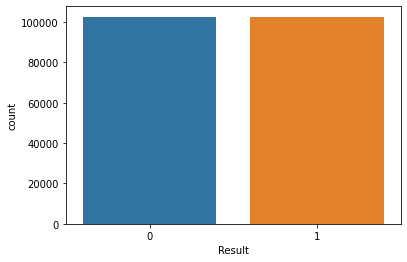

In [40]:
sns.countplot(x = 'Result',data = data_balanced)

<AxesSubplot:>

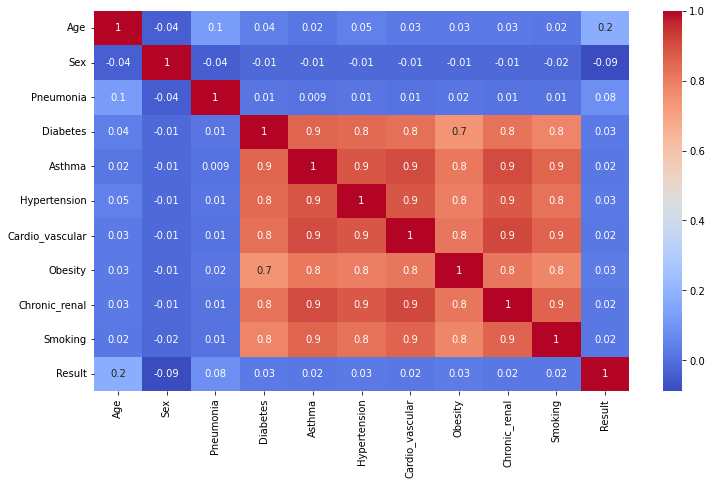

In [41]:
plt.figure(figsize = (12,7))
sns.heatmap(data_balanced.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

In [42]:
from sklearn.utils import shuffle
data_balanced = shuffle(data_balanced)

In [43]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(data_balanced.drop('Result',axis=1), 
                                                    data_balanced['Result'], test_size=0.20, 
                                                    random_state=101)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [47]:
DTpredictions = dtree.predict(X1_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y1_test,DTpredictions))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64     20515
           1       0.63      0.49      0.55     20549

    accuracy                           0.60     41064
   macro avg       0.60      0.60      0.59     41064
weighted avg       0.60      0.60      0.59     41064



In [50]:
# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['Decision Tree Accuracy']=accuracy_score(y1_test,DTpredictions)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy

{'Decision Tree Accuracy': 0.5993327488797974}

# DATA VISUALIZATION

<AxesSubplot:xlabel='Sex', ylabel='count'>

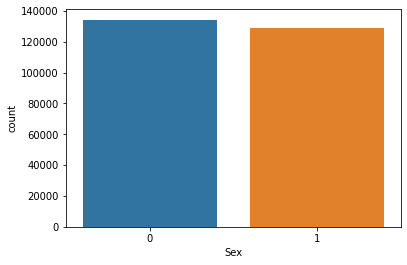

In [51]:
sns.countplot(x = 'Sex',data = sympdf)

<AxesSubplot:xlabel='Result', ylabel='count'>

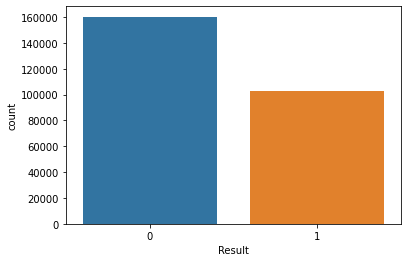

In [52]:
sns.countplot(x = 'Result',data = sympdf)

<AxesSubplot:xlabel='Sex', ylabel='count'>

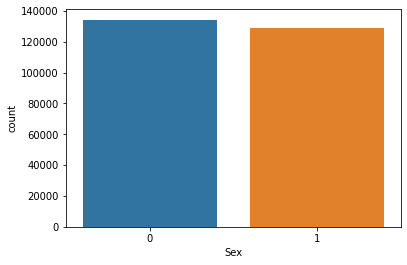

In [53]:
sns.countplot(x = 'Sex',data = sympdf)

In [54]:
#Age

<AxesSubplot:xlabel='Result', ylabel='Age'>

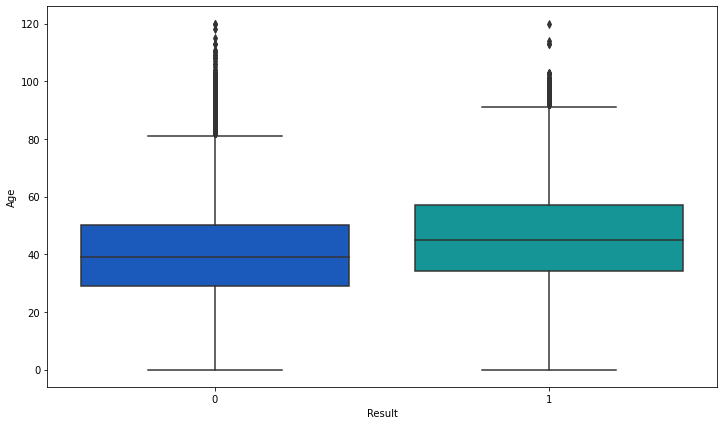

In [55]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Result',y='Age',data=sympdf,palette='winter')

## CORRELATION

<AxesSubplot:>

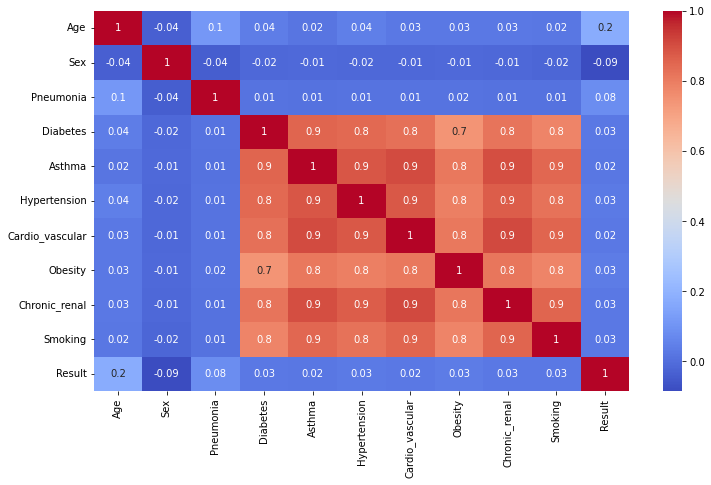

In [56]:
plt.figure(figsize = (12,7))
sns.heatmap(sympdf.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

All the dependent variables have a weak positive correlation with the independent variable i.e, result.

# MACHINE LEARNING 

#### SPLIT DATA INTO TRAINING AND TESTING DATA

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(sympdf.drop('Result',axis=1), 
                                                    sympdf['Result'], test_size=0.20, 
                                                    random_state=101)

## LOGISTIC REGRESSION

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel = LogisticRegression(max_iter = 270000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=270000)

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75     32070
           1       0.60      0.25      0.36     20532

    accuracy                           0.64     52602
   macro avg       0.63      0.57      0.55     52602
weighted avg       0.63      0.64      0.60     52602



In [80]:
from sklearn.metrics import confusion_matrix

## DECISION TREES

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
DTpredictions = dtree.predict(X_test)

In [63]:
print(classification_report(y_test,DTpredictions))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75     32070
           1       0.59      0.28      0.38     20532

    accuracy                           0.64     52602
   macro avg       0.62      0.58      0.56     52602
weighted avg       0.63      0.64      0.61     52602



In [64]:
print(confusion_matrix(y_test,predictions))

[[28640  3430]
 [15347  5185]]


In [ ]:
(5185+28640)/(5185)

## NEURAL NETWORK

In [59]:
X = sympdf.drop('Result',axis = 1).values
y = sympdf['Result'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
X_train = scaler.fit_transform(X_train)

In [65]:
X_test = scaler.transform(X_test)

In [66]:
from tensorflow.keras.models import Sequential

In [67]:
from tensorflow.keras.layers import Dense,Dropout

In [68]:
X_train.shape

(184104, 10)

In [69]:
model = Sequential()

model.add(Dense(10,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [57]:
model.fit(x = X_train,y= y_train,epochs = 50,validation_data = (X_test,y_test))

2021-11-10 16:29:06.502017: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-10 16:29:06.505043: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 184104 samples, validate on 78903 samples
Epoch 1/50
184104/184104 [==============================] - 12s 65us/sample - loss: 0.6497 - val_loss: 0.6447
Epoch 2/50
184104/184104 [==============================] - 11s 57us/sample - loss: 0.6422 - val_loss: 0.6387
Epoch 3/50
184104/184104 [==============================] - 11s 59us/sample - loss: 0.6376 - val_loss: 0.6367
Epoch 4/50
184104/184104 [==============================] - 11s 60us/sample - loss: 0.6361 - val_loss: 0.6366
Epoch 5/50
184104/184104 [==============================] - 11s 61us/sample - loss: 0.6356 - val_loss: 0.6351
Epoch 6/50
184104/184104 [==============================] - 11s 59us/sample - loss: 0.6348 - val_loss: 0.6347
Epoch 7/50
184104/184104 [==============================] - 12s 63us/sample - loss: 0.6344 - val_loss: 0.6370
Epoch 8/50
184104/184104 [==============================] - 12s 64us/sample - loss: 0.6340 - val_loss: 0.6341
Epoch 9/50
184104/184104 [==============================] - 11s 62us/

In [58]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

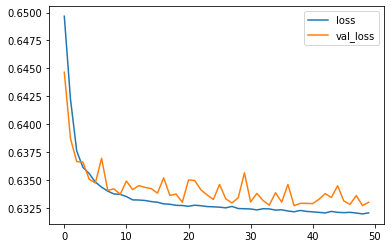

In [59]:
losses.plot()

## MODEL 2

In [70]:
model = Sequential()

model.add(Dense(10,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [71]:
model.fit(x = X_train,y= y_train,epochs = 50,validation_data = (X_test,y_test))

2021-11-30 07:38:31.609000: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-30 07:38:31.611909: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 184104 samples, validate on 78903 samples
Epoch 1/50
184104/184104 [==============================] - 12s 65us/sample - loss: 0.6492 - val_loss: 0.6435
Epoch 2/50
184104/184104 [==============================] - 11s 59us/sample - loss: 0.6414 - val_loss: 0.6389
Epoch 3/50
184104/184104 [==============================] - 11s 60us/sample - loss: 0.6379 - val_loss: 0.6380
Epoch 4/50
184104/184104 [==============================] - 11s 60us/sample - loss: 0.6367 - val_loss: 0.6359
Epoch 5/50
184104/184104 [==============================] - 11s 61us/sample - loss: 0.6359 - val_loss: 0.6355
Epoch 6/50
184104/184104 [==============================] - 11s 59us/sample - loss: 0.6354 - val_loss: 0.6350
Epoch 7/50
184104/184104 [==============================] - 12s 66us/sample - loss: 0.6349 - val_loss: 0.6346
Epoch 8/50
184104/184104 [==============================] - 11s 59us/sample - loss: 0.6345 - val_loss: 0.6349
Epoch 9/50
184104/184104 [==============================] - 11s 61us/

In [73]:
predictions = model.predict_classes(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75     48041
           1       0.59      0.34      0.43     30862

    accuracy                           0.65     78903
   macro avg       0.63      0.60      0.59     78903
weighted avg       0.64      0.65      0.62     78903



In [76]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[40794  7247]
 [20341 10521]]


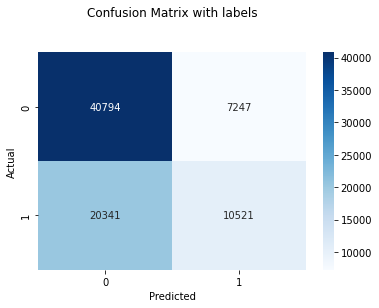

In [77]:
ax = sns.heatmap(cf, annot=True, fmt='g',cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
#ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

## MODEL3

In [64]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [66]:
model = Sequential()

model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'relu'))
model.add(Dropout(0.5))
#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [68]:
model.fit(x = X_train,y= y_train,epochs = 500,validation_data = (X_test,y_test),callbacks = [early_stop])

Train on 184104 samples, validate on 78903 samples
Epoch 1/500
184104/184104 [==============================] - 12s 66us/sample - loss: 0.6609 - val_loss: 0.6551
Epoch 2/500
184104/184104 [==============================] - 12s 67us/sample - loss: 0.6599 - val_loss: 0.6551
Epoch 3/500
184104/184104 [==============================] - 12s 65us/sample - loss: 0.6593 - val_loss: 0.6525
Epoch 4/500
184104/184104 [==============================] - 12s 66us/sample - loss: 0.6589 - val_loss: 0.6527
Epoch 5/500
184104/184104 [==============================] - 12s 66us/sample - loss: 0.6574 - val_loss: 0.6499
Epoch 6/500
184104/184104 [==============================] - 12s 66us/sample - loss: 0.6562 - val_loss: 0.6467
Epoch 7/500
184104/184104 [==============================] - 12s 67us/sample - loss: 0.6550 - val_loss: 0.6481
Epoch 8/500
184104/184104 [==============================] - 13s 69us/sample - loss: 0.6551 - val_loss: 0.6455
Epoch 9/500
184104/184104 [==============================] - 

Epoch 74/500
184104/184104 [==============================] - 13s 71us/sample - loss: 0.6519 - val_loss: 0.6433
Epoch 75/500
184104/184104 [==============================] - 13s 69us/sample - loss: 0.6523 - val_loss: 0.6442
Epoch 76/500
184104/184104 [==============================] - 13s 70us/sample - loss: 0.6512 - val_loss: 0.6433
Epoch 77/500
184104/184104 [==============================] - 13s 70us/sample - loss: 0.6528 - val_loss: 0.6442
Epoch 78/500
184104/184104 [==============================] - 13s 69us/sample - loss: 0.6517 - val_loss: 0.6439
Epoch 79/500
184104/184104 [==============================] - 13s 71us/sample - loss: 0.6515 - val_loss: 0.6439
Epoch 80/500
184104/184104 [==============================] - 13s 71us/sample - loss: 0.6528 - val_loss: 0.6433
Epoch 81/500
184104/184104 [==============================] - 13s 72us/sample - loss: 0.6520 - val_loss: 0.6442
Epoch 82/500
184104/184104 [==============================] - 13s 69us/sample - loss: 0.6517 - val_loss:

<AxesSubplot:>

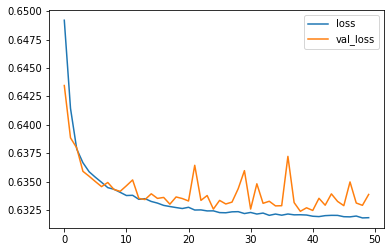

In [72]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [70]:
predictions = model.predict_classes(X_test)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76     48041
           1       0.67      0.12      0.20     30862

    accuracy                           0.63     78903
   macro avg       0.65      0.54      0.48     78903
weighted avg       0.65      0.63      0.54     78903



In [1]:
# Model 2 had the highest accuracy of 64%